# Problem Set 3 CS129.18

The following problem set will revolve around the Enron Emails dataset.
The dataset `data/enron-data/` directory has 6 files. The objective is to build a classifier for whether email is spam or not.


## Requirements


>Spam or Ham?

Using the lessons on Naive Bayes and TF-IDF, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

**Using Enron 1 and 2**

1. How many Spam Emails are there? ( 1 pt )

2. Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body ( 7 pts )

3. Build a Naive Bayes classifier to classify whether emails are spam or not. ( 3 pts )

4. What is the longest ham email? ( 1 pt )

5. What is the accuracy of your model?( 1 pt )

6. Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? (7 pts)



-----


Bonus : Answer questions 1-6 using Enron 1,2, and 3. (5 pts)

----

**Submit this file on Moodle on the submission link I will provide. This is due October 18 12nn.**

In [2]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os
import random
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")

#online resource
from email.parser import Parser

In [3]:
rootdir = "enron-data/enron1"
rootdir2 = "enron-data/enron2"
# rootdir3 = "enron-data/enron3"
# Loop through all the directories, sub directories and files in the above folder, and print them.
for directories, subdirs, files in os.walk(rootdir):
    print(directories, subdirs, len(files))
for directories, subdirs, files in os.walk(rootdir2):
    print(directories, subdirs, len(files))
# for directories, subdirs, files in os.walk(rootdir3):
#     print(directories, subdirs, len(files))

enron-data/enron1 ['ham', 'spam'] 2
enron-data/enron1\ham [] 3672
enron-data/enron1\spam [] 1499
enron-data/enron2 ['ham', 'spam'] 1
enron-data/enron2\ham [] 4361
enron-data/enron2\spam [] 1494


In [4]:
ham_list = []
spam_list = []
spam = 0

# Same as before, but this time, read the files, and append them to the ham and spam list
for directories, subdirs, files in os.walk(rootdir):
    if (os.path.split(directories)[1]  == 'ham'):
        for filename in files:      
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                ham_list.append(data)
    
    if (os.path.split(directories)[1]  == 'spam'):
        for filename in files:
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                spam += 1
                spam_list.append(data)
                
for directories, subdirs, files in os.walk(rootdir2):
    if (os.path.split(directories)[1]  == 'ham'):
        for filename in files:      
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                ham_list.append(data)
    
    if (os.path.split(directories)[1]  == 'spam'):
        for filename in files:
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                spam += 1
                spam_list.append(data)

# for directories, subdirs, files in os.walk(rootdir3):
#     if (os.path.split(directories)[1]  == 'ham'):
#         for filename in files:      
#             with open(os.path.join(directories, filename), encoding="latin-1") as f:
#                 data = f.read()
#                 ham_list.append(data)
    
#     if (os.path.split(directories)[1]  == 'spam'):
#         for filename in files:
#             with open(os.path.join(directories, filename), encoding="latin-1") as f:
#                 data = f.read()
#                 spam += 1
#                 spam_list.append(data)
                
print("ham_list")
print(ham_list[2])

print("spam_list")
print(spam_list[2])

spam

ham_list
Subject: calpine daily gas nomination
- calpine daily gas nomination 1 . doc
spam_list
Subject: get that new car 8434
people nowthe weather or climate in any particular environment can change and affect what people eat and how much of it they are able to eat .


2993

## PS 3.1 Number of Spam Emails

In [5]:
print(f"There are {len(spam_list)} spam emails.")

There are 2993 spam emails.


## PS 3.2 Structuring data

### spam_list

In [6]:
subject = []
body = []
sender=[]

for spam in spam_list:
    message = ""
    lines = spam.splitlines()
    for line in lines:
        if line.startswith('Subject:'):
            subject.append(line[len('Subject: '):])
        elif line.startswith('Sender:'):
            sender.append(line[len('Sender: '):])
        else:
            message += line + " "
    body.append(message)

spam_tuples = list(zip(subject,body))

## ham_list

In [7]:
subject = []
body = []

for ham in ham_list:
    message = ""
    lines = ham.splitlines()
    for line in lines:
        if line.startswith('Subject:'):
            subject.append(line[len('Subject: '):])
        else:
            message += line
    body.append(message)

ham_tuples = list(zip(subject,body))

In [8]:
# Code for adding status and combining ham spam

df = pd.DataFrame(spam_tuples, columns=['subject','body'])

spam_df = df.assign(status='spam')

df = pd.DataFrame(ham_tuples, columns=['subject','body'])

ham_df = df.assign(status='ham')

data = pd.concat([spam_df, ham_df], axis=0)
len(data)

11026

In [9]:
len(spam_df)

2993

In [10]:
len(ham_df)

8033

## email dataframe

In [11]:
data

,subject,body,status
0,dobmeos with hgh my energy level has gone up !...,introducing doctor - formulated hgh human grow...,spam
1,your prescription is ready . . oxwq s f e,"low cost prescription medications soma , ultra...",spam
2,get that new car 8434,people nowthe weather or climate in any partic...,spam
3,await your response,"dear partner , we are a team of government off...",spam
4,"coca cola , mbna america , nascar partner with...",stock profile about company investment highlig...,spam
...,...,...,...
8028,"re : hi ,","jinbaek ,great , i look forward to working wit...",ham
8029,california update 5 / 22 / 01,please treat as confidentiala source had a mee...,ham
8030,fwd : follow - up call,return - path :received : from rly - yho 3 . m...,ham
8031,resignation effective june 5,"vince ,i am planning to make my resignation fr...",ham


## Cleaning the data

In [12]:
# different ways of cleaning body column
# https://towardsdatascience.com/tokenize-text-columns-into-sentences-in-pandas-2c08bc1ca790
import re

data['body'] = data['body'].apply(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))

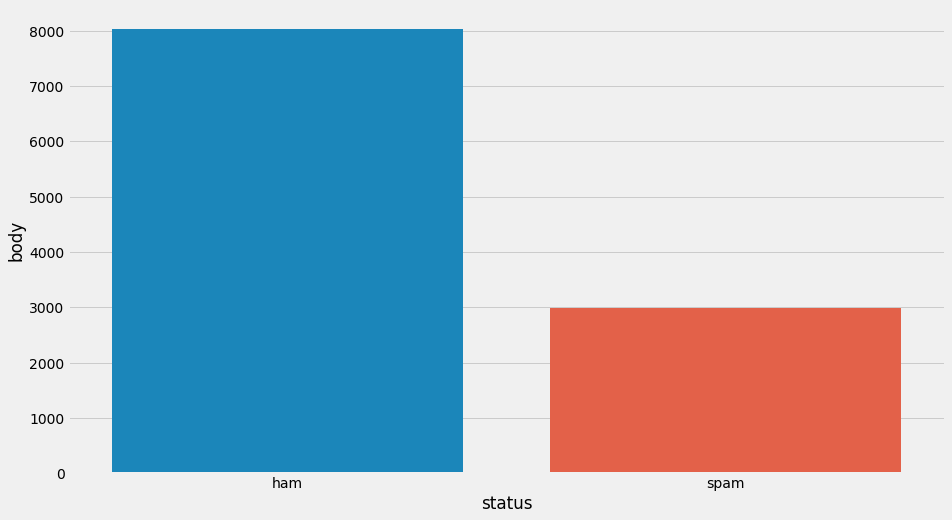

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,8))

df_2 = data.groupby('status').count()
df_2.reset_index(inplace=True)
sns.barplot(x='status', y='body', data=df_2);

## PS 3.3 Building a Naive Bayes Classifier

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_X = vectorizer.fit_transform(data['body']) #vectorize all the text data

train_x, test_x, train_y, test_y = train_test_split(vectorized_X, data["status"]) #plit the vectorized text and the labels

print(train_x.shape, test_x.shape)

(8269, 115848) (2757, 115848)


In [15]:
classifier = GaussianNB()
classifier.fit(train_x.todense(), train_y)

GaussianNB()

In [16]:
classifier.score(test_x.toarray(), test_y)

0.9619151251360174

## PS 3.4 Longest email

In [22]:
longest_email = max(body, key=len)
longest_email

'fyi news articles from indian press .- - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -nikita varma04 / 27 / 2001 07 : 51 amto : nikita varma / enron _ development @ enron _ developmentcc : ( bcc : sandeep kohli / enron _ development )subject : from the enron india newsdesk - april 27 th newsclipsfriday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htmdpc board empowers md to cancel mseb contractfriday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htmmseb pays rs 134 cr under \' protest \' to dpcfriday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3enron india md authorised to terminate ppafriday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl . htmlforeign lenders slam brakes on disbursements to dpc , sanjay jog & raghu mohanglobal

## PS 3.5 Model Accuracy

In [17]:
scores = cross_val_score(classifier, test_x.toarray(), test_y, cv=2)
acc = scores.mean()
print("Accuracy: %0.2f percent (+/- %0.2f)" % (acc *100, scores.std()))
scores

Accuracy: 93.58 percent (+/- 0.01)


array([0.92893401, 0.94267054])

In [18]:
mess = [ "is your refigerator running?", "Please report to the meeting at 9am", "Hi boss, I would like to request for a leave"]
output = classifier.predict(vectorizer.transform(mess).toarray())

for i ,m in enumerate(mess):
    print(m, ' == ', output[i])

is your refigerator running?  ==  spam
Please report to the meeting at 9am  ==  spam
Hi boss, I would like to request for a leave  ==  spam


## Including Subject in the analysis

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

data['subject'] = data['subject'].apply(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))

model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
vectorized_X = vectorizer.fit_transform(data['subject']) #vectorize all the text data

train_x, test_x, train_y, test_y = train_test_split(vectorized_X, data["status"]) #Split the vectorized text and the labels

print(train_x.shape, test_x.shape)

classifier = GaussianNB()
classifier.fit(train_x.todense(), train_y)

(8269, 7578) (2757, 7578)


GaussianNB()

In [20]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

categories = ['subject', 'body']

train = data(subset='train', categories=categories)
test = data(subset='test', categories=categories)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)


mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

TypeError: 'DataFrame' object is not callable